In [37]:
import json
import matplotlib.pyplot as plt
import requests
import numpy as np

# Firebase URL (make sure to replace it with your database URL)
DATABASE_URL = "https://mazeshift-marauders-67598-default-rtdb.firebaseio.com/"

headers = {}  # Add headers if necessary, e.g., for authentication
# headers = {"Authorization": "Bearer " + TOKEN}

response = requests.get(DATABASE_URL + "LevelInfo.json", headers=headers)
data = response.json()
# 
# 
# # Parse data from JSON
# player_ids = list(data['Player'].keys())
# ages = [entry['age'] for entry in data['Player'].values()]

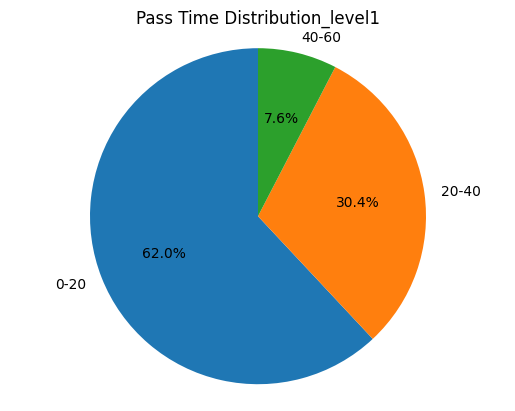

In [2]:
intervals = [entry['Interval'] for entry in data.values() if entry["LevelNum"] == 1]
# 计算各个范围的数量
count_0_20 = sum(1 for x in intervals if 0 <= x <= 20)
count_20_40 = sum(1 for x in intervals if 20 < x <= 40)
count_40_60 = sum(1 for x in intervals if 40 < x <= 60)

counts = [count_0_20, count_20_40, count_40_60]
labels = ['0-20', '20-40', '40-60']

# 绘制饼图
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Pass Time Distribution_level1")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



[3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 4, 2, 3, 2, 5, 4, 4, 3, 5, 2, 4, 4, 4, 4, 5, 3, 3, 5, 2, 3, 3, 5, 3, 4, 4, 6, 4, 3, 2, 4, 5, 3, 3, 3, 3, 3]


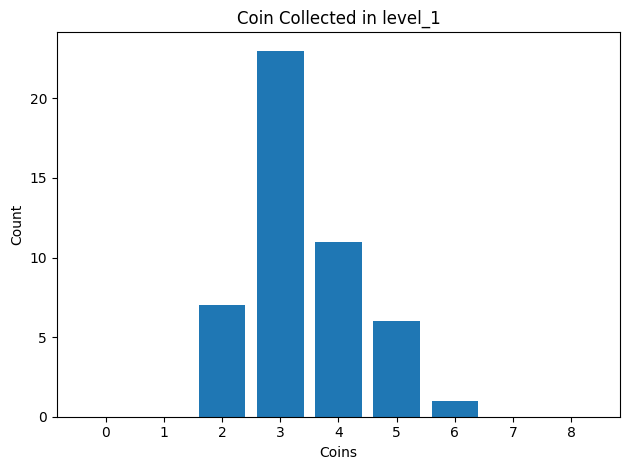

In [13]:
coins = [entry['CoinCollected'] for entry in data.values() if entry["LevelNum"] == 1]
print(coins)

plt.hist(coins, bins=9, range=(0, 9), align='left', rwidth=0.8)

plt.xlabel('Coins')
plt.ylabel('Count')
plt.title('Coin Collected in level_1')
plt.xticks(range(0, 9))

plt.tight_layout()
plt.show()

[3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 4, 2, 3, 2, 5, 4, 4, 3, 5, 2, 4, 4, 4, 4, 5, 3, 3, 5, 2, 3, 3, 5, 3, 4, 4, 6, 4, 3, 2, 4, 5, 3, 3, 3, 3, 3]


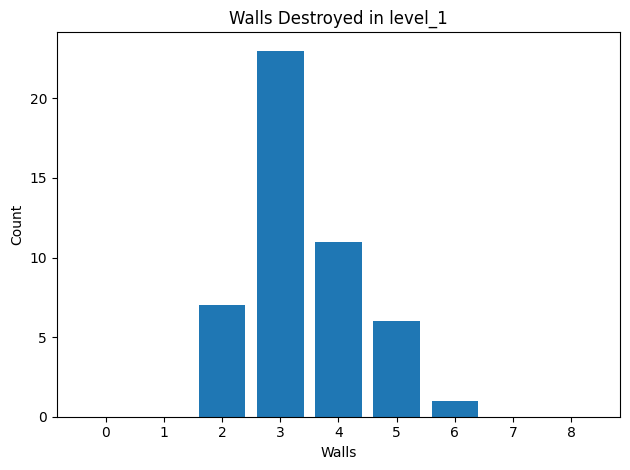

In [16]:
walls = [entry['DestroyedWalls'] for entry in data.values() if entry["LevelNum"] == 1]
print(coins)

plt.hist(coins, bins=9, range=(0, 9), align='left', rwidth=0.8)

plt.xlabel('Walls')
plt.ylabel('Count')
plt.title('Walls Destroyed in level_1')
plt.xticks(range(0, 9))

plt.tight_layout()
plt.show()

[6, 4, 5, 2, 0, 8, 6, 0, 0, 5, 9, 2, 6, 3, 5, 9, 2, 7, 9, 1, 7, 8, 4, 2, 1, 3, 5, 3, 6, 6, 4, 3, 0, 6, 3, 3, 3, 5, 4, 4, 9, 8, 8, 5, 9, 0, 5, 8]


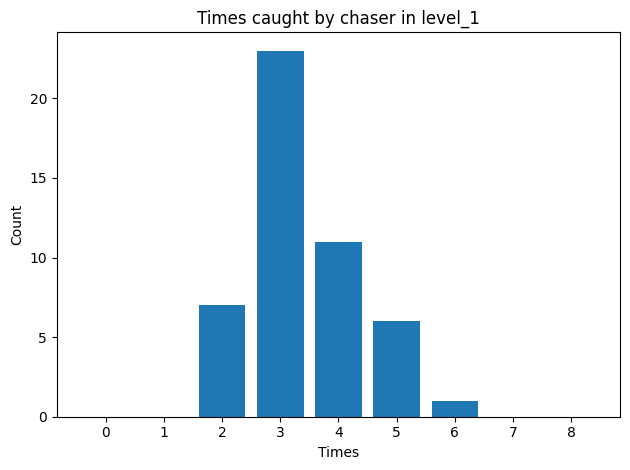

In [18]:
plt.show()
chasers = [entry['DeadByChaser'] for entry in data.values() if entry["LevelNum"] == 1]
print(chasers)

plt.hist(coins, bins=9, range=(0, 9), align='left', rwidth=0.8)

plt.xlabel('Times')
plt.ylabel('Count')
plt.title('Times caught by chaser in level_1')
plt.xticks(range(0, 9))

plt.tight_layout()
plt.show()

{'0-20': [271, 78, 58, 29, 1, 10], '20-40': [139, 41, 38, 26, 4, 2], '40-70': [42, 15, 24, 13, 5, 3], 'failed': [9, 4, 2, 6, 0, 3]}


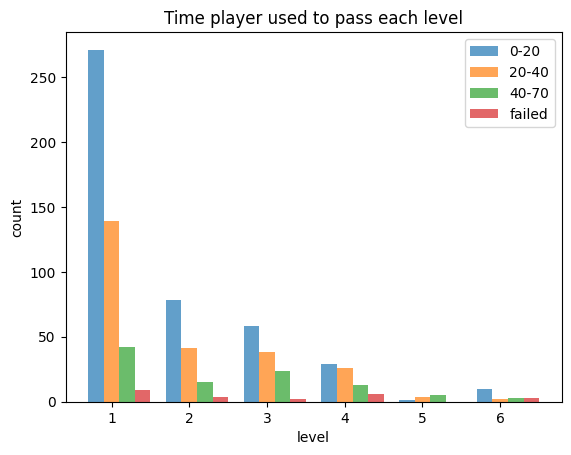

In [38]:


game_data = []
for entry in data.values():
    if entry["IsSuccess"] == "false":
        game_data.append({"time": 100, "level": entry["LevelNum"]})
    else:
        game_data.append({"time": entry["Interval"], "level": entry["LevelNum"]})

# game_data = [
#     {"level": 1, "time": 25},
#     {"level": 1, "time": 18},
#     {"level": 1, "time": 35},
#     {"level": 2, "time": 30},
#     {"level": 2, "time": 42},
#     {"level": 2, "time": 38},
#     {"level": 3, "time": 10},
#     {"level": 3, "time": 50},
#     {"level": 3, "time": 55},
# ]


ranges = ['0-20', '20-40', '40-70', "failed"]


range_counts = {range_label: [0, 0, 0, 0, 0, 0] for range_label in ranges}



for item in game_data:
    if item["time"] < 20:
        range_counts['0-20'][item["level"] - 1] += 1
    elif 20 <= item["time"] < 40:
        range_counts['20-40'][item["level"] - 1] += 1
    elif 40 <= item["time"] < 70:
        range_counts['40-70'][item["level"] - 1] += 1
    else:
        range_counts['failed'][item["level"] - 1] += 1
        
        
# for range_label in ranges:
#     for level in range(1, 7):
#         counts = [data["time"] for data in game_data if (data["time"] >= int(range_label.split('-')[0])) and (
#                     data["time"] <= int(range_label.split('-')[1])) and (data["level"] == level)]
#         range_counts[range_label].append(len(counts))


levels = range(1, 7)
num_levels = len(levels)


bar_width = 0.2
index = np.arange(num_levels)
opacity = 0.7
print(range_counts)
for i, range_label in enumerate(ranges):
    plt.bar(index + i * bar_width, range_counts[range_label], bar_width, alpha=opacity, label=range_label)

plt.xlabel('level')
plt.ylabel('count')
plt.title('Time player used to pass each level')
plt.xticks(index + bar_width, levels)
plt.legend()
plt.show()

[19, 20, 27, 48, 34, 22]
[3, 5, 6, 8, 2, 2]


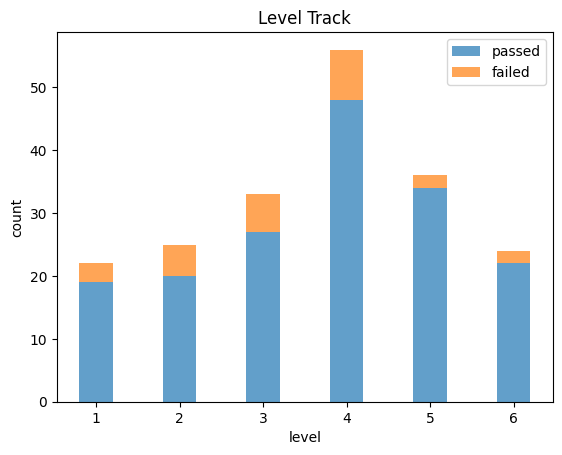

In [35]:
response = requests.get(DATABASE_URL + "LevelTrack.json", headers=headers)
track_data = response.json().values()

# game_data = [
#     {'StartLevel': 1, 'EndLevel': 3, 'IsReachTheEnd': True},
#     {'StartLevel': 2, 'EndLevel': 3, 'IsReachTheEnd': False},
#     {'StartLevel': 1, 'EndLevel': 4, 'IsReachTheEnd': True},
#     {'StartLevel': 2, 'EndLevel': 4, 'IsReachTheEnd': True},
#     {'StartLevel': 3, 'EndLevel': 4, 'IsReachTheEnd': False},
# ]

pass_counts = {}
fail_counts = {}

for data in track_data:
    start_level = data['StartLevel']
    end_level = data['EndLevel']
    is_reach_the_end = data['IsReachTheEnd']
    
    for level in range(start_level, end_level + 1):
        if is_reach_the_end:
            pass_counts[level] = pass_counts.get(level, 0) + 1
        elif level == end_level:
            fail_counts[level] = fail_counts.get(level, 0) + 1

levels = sorted(set(list(pass_counts.keys()) + list(fail_counts.keys())))

bar_width = 0.4
index = range(1, len(levels) + 1)

pass_data = [pass_counts.get(level, 0) for level in levels]
fail_data = [fail_counts.get(level, 0) for level in levels]
# Mock up
pass_data = [19, 20, 27, 48, 34, 22]
fail_data = [3, 5, 6, 8, 2, 2]
print(pass_data)
print(fail_data)
plt.bar(index, pass_data, bar_width, label='passed', alpha=0.7)
plt.bar(index, fail_data, bar_width, label='failed', bottom=pass_data, alpha=0.7)

plt.xlabel('level')
plt.ylabel('count')
plt.title('Level Track')
plt.xticks(index, levels)
plt.legend()
plt.show()
